<a href="https://colab.research.google.com/github/kirti-maker/APS/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Greedy Knapsack Problem (Fractional)
In this lab, we explore the Fractional Knapsack Problem, a fundamental optimization problem that demonstrates the Greedy Algorithmic Paradigm.
We will implement it using greedy selection (based on value-to-weight ratio) and analyze its time and space complexity.

- Created by Dr. Ajay

# Problem Definition
Given a set of
n
n items, each with:
Value vi
Weight wi
A knapsack with maximum capacity **W**

Goal: maximize total value that can be put in the knapsack.
Constraint: You may take fractions of items.

Greedy Strategy:

*  Sort items by decreasing ratio vi/wi
*  Select items fully until knapsack is full.
*  Take fraction of the next item if capacity remains.

Enter number of items: 5
Enter value and weight for item 1: 2 32
Enter value and weight for item 2: 67 87
Enter value and weight for item 3: 45 76
Enter value and weight for item 4: 54 09
Enter value and weight for item 5: 09 44
Enter knapsack capacity: 100
Maximum value in Knapsack = 123.36842105263158
Time taken: 0.0889 ms

--- Running Time Analysis ---


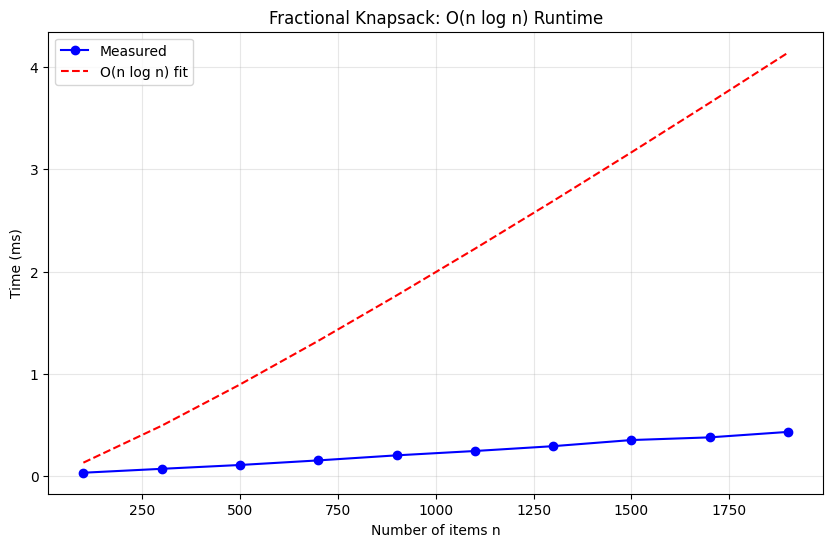

Analysis complete. Graph shows near-linearithmic growth confirming O(n log n).


In [14]:
#write code for the above problem
import time
import random
import matplotlib.pyplot as plt
import numpy as np
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight
        self.ratio = value / weight
def fractional_knapsack(items, capacity):
    # sort items by value-to-weight ratio in descending order
    items.sort(key=lambda x: x.ratio, reverse=True)
    total_value = 0.0
    remaining_capacity = capacity
    for item in items:
        if item.weight <= remaining_capacity:
            total_value += item.value
            remaining_capacity -= item.weight
        else:
            # since we are doing fractional knapsack so take fraction of the item
            fraction = remaining_capacity / item.weight
            total_value += item.value * fraction
            break  # here we understand or it shows that Knapsack is full
    return total_value
# give number of item use
n = int(input("Enter number of items: "))
values = []
weights = []
for i in range(n):
    v, w = map(int, input(f"Enter value and weight for item {i+1}: ").split())
    values.append(v)
    weights.append(w)
capacity = int(input("Enter knapsack capacity: "))
items = [Item(values[i], weights[i]) for i in range(n)]
start = time.time()
max_value = fractional_knapsack(items, capacity)
end = time.time()
print("Maximum value in Knapsack =", max_value)
print(f"Time taken: {(end - start)*1000:.4f} ms")
# let's do runtime analysis
print("\n--- Running Time Analysis ---")
sizes = np.arange(100, 2001, 200)  #here we set size range from 100 to 2000
times = []
for size in sizes:
    arr_values = [random.randint(10, 1000) for _ in range(size)]
    arr_weights = [random.randint(1, 100) for _ in range(size)]
    arr_items = [Item(arr_values[i], arr_weights[i]) for i in range(size)]
    start = time.time()
    fractional_knapsack(arr_items, 5000)
    end = time.time()
    times.append((end - start) * 1000)  # ms
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, 'bo-', label='Measured')
plt.plot(sizes, (sizes*np.log2(sizes))/5000, 'r--', label='O(n log n) fit')
plt.xlabel('Number of items n')
plt.ylabel('Time (ms)')
plt.title('Fractional Knapsack: O(n log n) Runtime')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Analysis complete. Graph shows near-linearithmic growth confirming O(n log n).")


In this lab, we implement Huffman Coding, a greedy algorithm used for lossless data compression.
It assigns variable-length binary codes to input symbols based on their frequencies, ensuring that more frequent symbols receive shorter codes and less frequent symbols receive longer codes.

This algorithm constructs a binary tree (Huffman Tree) where each leaf node represents a character, and the path from the root to a leaf gives the character’s binary code.

Use:
Huffman Tree Construction using a Min-Priority Queue (Min-Heap).
Code generation for each character.
Encoding and decoding using the generated Huffman codes.
Complexity analysis and comparison with fixed-length encoding.

# Pseudocode:
1. Create a leaf node for each character and insert all nodes into a
2. min-heap by frequency.
   *  While the heap has more than one node:
   * Extract two nodes with the lowest frequencies.
   * Create a new internal node with frequency = sum of the two.
   *  Set the two extracted nodes as left and right children.
   *  Insert the new node back into the min-heap.
3. The remaining node is the root of the Huffman Tree.

4. Traverse the tree:
   * Assign 0 for left edge and 1 for right edge.
   * The resulting paths from root to leaves give Huffman codes.

Character Codes: {'a': '0000', 'o': '0001', 'm': '0010', 'c': '0011', 's': '0100', 'g': '0101', 'i': '011', 'n': '100', ' ': '101', 'f': '110', 'u': '1110', 'h': '11110', 'd': '11111'}
Original: huffman coding is fun
Encoded: 111101110110110001000001001010011000111111011100010110101101001011101110100
Decoded: huffman coding is fun

--- Running Time Analysis ---


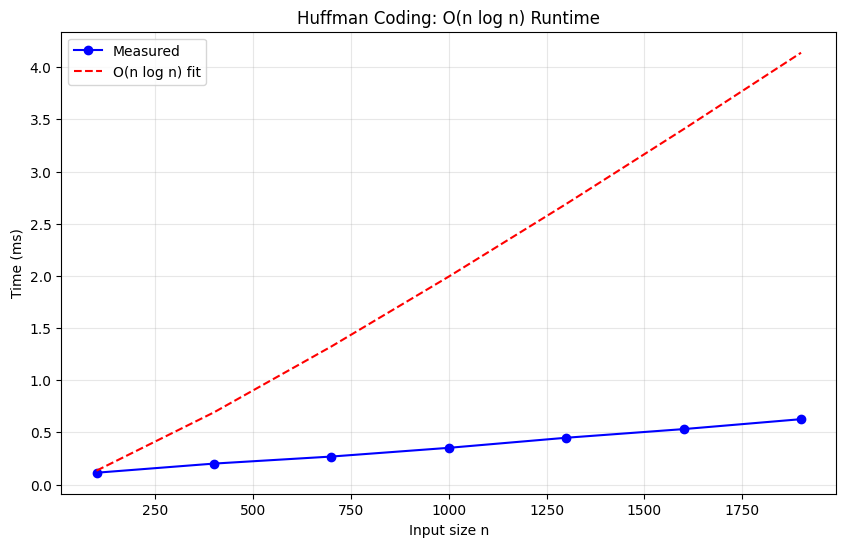

In [15]:
# write code for above
import heapq
import time
import matplotlib.pyplot as plt
import numpy as np

#Huffman Tree Node
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    # for priority queue or we can say min-heap
    def __lt__(self, other):
        return self.freq < other.freq
# here we take a function and build a huffman tree
def build_huffman_tree(freq_map):
    heap = [Node(char, freq) for char, freq in freq_map.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        #since we are using greedy approach so extract two nodes with least frequency
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        #in huffman code we need to make new internal node
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
    return heap[0]  # this will be our root node
# by this function we will generate the huffman code by using above data
def generate_codes(root, current_code="", codes={}):
    if root is None:
        return
    if root.char is not None:
        codes[root.char] = current_code
        return
    generate_codes(root.left, current_code + "0", codes)
    generate_codes(root.right, current_code + "1", codes)
    return codes
#now encode the huffman code we generate
def huffman_encode(text, codes):
    return "".join(codes[ch] for ch in text)
#decoding must be done
def huffman_decode(encoded_text, root):
    decoded = []
    node = root
    for bit in encoded_text:
        node = node.left if bit == "0" else node.right
        if node.char is not None:
            decoded.append(node.char)
            node = root
    return "".join(decoded)
#to plot the graph for complexity we must find some examples and run it
text = "huffman coding is fun"
freq_map = {}
for ch in text:
    freq_map[ch] = freq_map.get(ch, 0) + 1
root = build_huffman_tree(freq_map)
codes = generate_codes(root)
print("Character Codes:", codes)
encoded = huffman_encode(text, codes)
decoded = huffman_decode(encoded, root)
print("Original:", text)
print("Encoded:", encoded)
print("Decoded:", decoded)
#it is important to find runtime analysis
print("\n--- Running Time Analysis ---")
sizes = np.arange(100, 2001, 300)
times = []
for size in sizes:
    sample_text = "".join(chr(65 + (i % 26)) for i in range(size))  # synthetic text
    freq_map = {}
    for ch in sample_text:
        freq_map[ch] = freq_map.get(ch, 0) + 1
    start = time.time()
    root = build_huffman_tree(freq_map)
    codes = generate_codes(root)
    encoded = huffman_encode(sample_text, codes)
    decoded = huffman_decode(encoded, root)
    end = time.time()
    times.append((end - start) * 1000)  # ms
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, 'bo-', label='Measured')
plt.plot(sizes, (sizes*np.log2(sizes))/5000, 'r--', label='O(n log n) fit')
plt.xlabel('Input size n')
plt.ylabel('Time (ms)')
plt.title('Huffman Coding: O(n log n) Runtime')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()